In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!ls /content/drive/MyDrive/Datasets/'World Bank Transformed'



'X_test without PCA.csv'  'X_train without PCA.csv'   y_test.csv
'X_test with PCA.csv'	  'X_train with PCA.csv'      y_train.csv


In [14]:
import pandas as pd

In [15]:
X_train = pd.read_csv('/content/drive/MyDrive/Datasets/World Bank Transformed/X_train with PCA.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Datasets/World Bank Transformed/y_train.csv').values.ravel()
X_test = pd.read_csv('/content/drive/MyDrive/Datasets/World Bank Transformed/X_test with PCA.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Datasets/World Bank Transformed/y_test.csv').values.ravel()

In [16]:
gb_model = GradientBoostingRegressor(n_estimators=800, learning_rate=0.1, max_depth=6, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=800, random_state=42)

In [17]:
y_pred = gb_model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.6151860230152602
Mean Squared Error: 0.7825056607787161
R-squared: 0.990477676429575


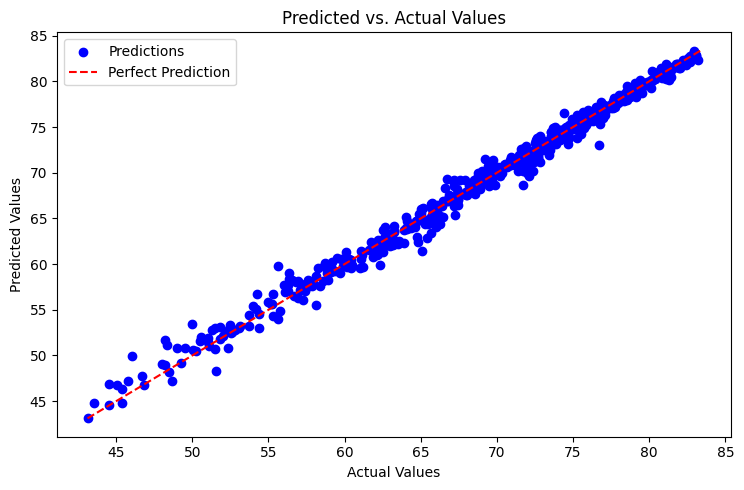

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))


ax.scatter(y_test, y_pred, color='blue', label='Predictions')


min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
ax.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')


ax.set_title('Predicted vs. Actual Values')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')



ax.set_aspect(0.6)


ax.legend()


plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [850, 900, 950, 1000],
    'learning_rate': [ 0.1, 0.11,0.12],
    'max_depth': [ 5, 6,7]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)
tuned_mae = mean_absolute_error(y_test,y_pred)
tuned_mse = mean_squared_error(y_test, y_pred)
tuned_r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (Tuned Model):", tuned_mae)
print("Mean Squared Error (Tuned Model):", tuned_mse)
print("R-squared (Tuned Model):", tuned_r2)

Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000}
Mean Absolute Error (Tuned Model): 0.6145235465487191
Mean Squared Error (Tuned Model): 0.782168932818654
R-squared (Tuned Model): 0.9904817740773642
